In [1]:
import pandas as pd
import numpy as np
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)

DATA PREPROCESSING:

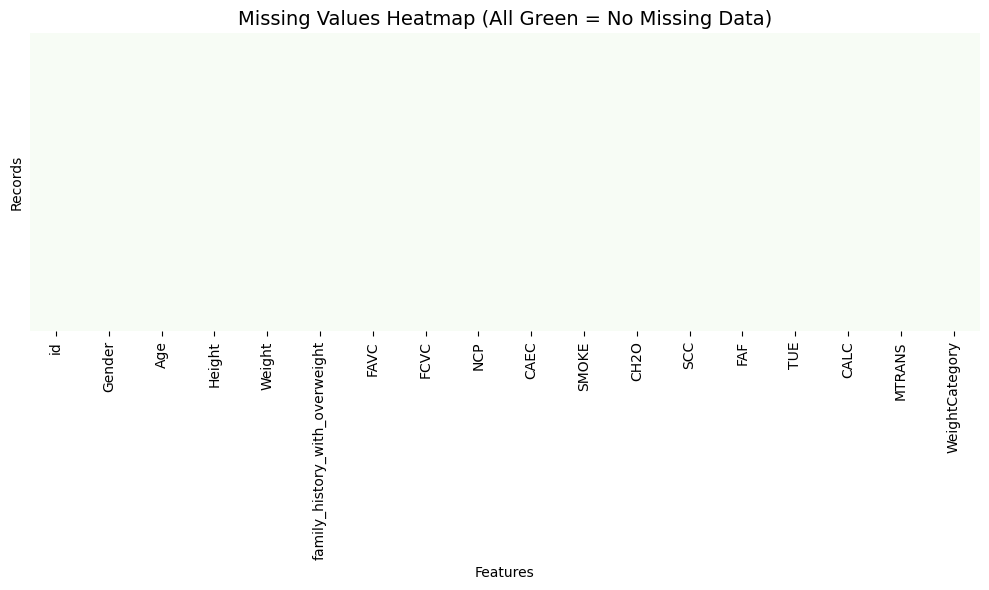

✅ Heatmap saved successfully at: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\1 null value


In [2]:
# handling missing data
# ===========================================
# 🔍 Missing Values Visualization
# ===========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Greens")
plt.title("Missing Values Heatmap (All Green = No Missing Data)", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Records")
plt.tight_layout()

# ---- SAVE THE IMAGE ----
save_path = r"C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\1 null value"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# (Optional) Show on screen too
plt.show()

print(f"✅ Heatmap saved successfully at: {save_path}")

In [3]:
# ===========================================
# Outlier Detection & Visualization (Uniform Colors)
# ===========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Load Data ---
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# --- 2. Numerical Columns ---
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# --- 3. Create Save Directory ---
save_dir = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports'
os.makedirs(save_dir, exist_ok=True)
print(f"Plots will be saved to: {save_dir}\n")

# --- 4. Define uniform colors ---
box_color = "#2a9d8f"       # Mako shade for boxplots
hist_color = "#e9c46a"      # Mako shade for histograms
scatter_color = "#264653"   # Mako shade for scatter normal points
outlier_color = "red"       # Outliers

# --- 5. Outlier Detection using IQR ---
outlier_features = []

for col in numerical_cols:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found. Skipping.")
        continue
    
    # IQR calculation
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outlier indices
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        outlier_features.append(col)

    # --- Plotting ---
    fig, axes = plt.subplots(3, 1, figsize=(6, 10))

    # 1️⃣ Box Plot
    sns.boxplot(data=df, x=col, ax=axes[0], color=box_color, orient="h")
    axes[0].set_title(f'Box Plot for {col}')

    # 2️⃣ Histogram + KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[1], color=hist_color)
    axes[1].set_title(f'Histogram + KDE for {col}')

    # 3️⃣ Scatter for IQR Outliers
    axes[2].scatter(df.index, df[col], color=scatter_color, label='Normal')
    axes[2].scatter(outliers.index, outliers, color=outlier_color, label='Outliers')
    axes[2].set_title(f'IQR Outlier Highlight for {col}')
    axes[2].set_xlabel('Index')
    axes[2].set_ylabel(col)
    axes[2].legend()

    plt.tight_layout()

    # Save combined plot
    plot_path = os.path.join(save_dir, f"2_{col}_outlier_analysis.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Saved combined plot for {col} → {plot_path}")

# --- 6. Print Features with Outliers ---
print("\nFeatures containing outliers (by IQR method):")
print(outlier_features)


Plots will be saved to: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports

Saved combined plot for Age → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Age_outlier_analysis.png
Saved combined plot for Height → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Height_outlier_analysis.png
Saved combined plot for Weight → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Weight_outlier_analysis.png
Saved combined plot for FCVC → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_FCVC_outlier_analysis.png
Saved combined plot for NCP → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_NCP_outlier_analysis.png
Saved combined plot for CH2O → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_CH2O_outlier_analysis.png
Saved combined plot for FAF → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_FAF_outlier_analysis.png
Saved combined plot for TUE → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_TUE_outlier_analysis.png

Features containing outliers (by IQR method):
['Age', 'Height', 'NCP']

we apply boxcox tranformation on outliers to reduce their skewness and reduce the influence of extreme values

In [4]:
# to normalize skewed numerical features:
from scipy import stats
age_boxcox, best_lambda = stats.boxcox(df['Age'])
weight_boxcox, best_lambda = stats.boxcox(df['Weight'])

# 2. Store the transformed data in a new column
df['Age_BoxCox'] = age_boxcox
df['Weight_BoxCox'] = weight_boxcox

In [5]:
# ===========================================
# 📊 Outlier Detection (Boxplot + Distribution)
# and Save Each Plot to a Folder
# ===========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Load Your Data ---
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# --- 2. Numerical Columns ---
numerical_cols = [
    'Age', 'Height', 'Weight', 'FCVC',
    'NCP', 'CH2O', 'FAF', 'TUE'
]

# --- 3. Create Save Directory ---
save_dir = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports'
os.makedirs(save_dir, exist_ok=True)
print(f"Plots will be saved to: {save_dir}\n")

# --- 4. Loop and Plot Each Feature ---
for col in numerical_cols:

    if col not in df.columns:
        print(f"⚠️  Warning: Column '{col}' not found. Skipping.")
        continue

    # --- A. Box Plot ---
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df, x=col, color="#1f77b4", orient="h")
    plt.title(f'Box Plot for {col} (Outlier Check)')
    plt.xlabel(col)
    plt.tight_layout()

    # Save the box plot
    boxplot_path = os.path.join(save_dir, f"2_{col}_boxplot.png")
    plt.savefig(boxplot_path, dpi=300, bbox_inches='tight')
    plt.close()  # close the figure to save memory
    print(f"✅ Saved box plot: {boxplot_path}")

    # --- B. Distribution Plot ---
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=col, kde=True, color="#ff7f0e")
    plt.title(f'Distribution Curve for {col} (Skewness Check)')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

    # Save the distribution plot
    distplot_path = os.path.join(save_dir, f"2_{col}_dist.png")
    plt.savefig(distplot_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Saved distribution plot: {distplot_path}")

print("\nAll plots generated and saved successfully!")

Plots will be saved to: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports

✅ Saved box plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Age_boxplot.png
✅ Saved distribution plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Age_dist.png
✅ Saved box plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Height_boxplot.png
✅ Saved distribution plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Height_dist.png
✅ Saved box plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Weight_boxplot.png
✅ Saved distribution plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_Weight_dist.png
✅ Saved box plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_FCVC_boxplot.png
✅ Saved distribution plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_FCVC_dist.png
✅ Saved box plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_NCP_boxplot.png
✅ Saved distribution plot: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\2_NCP_dist.png
✅ Saved box plot: C:\Users\Nir\Documents\Mt

In [6]:
# ===========================================
# 🎨 Rare Category Detection (Visual + Summary) with Color Palette
# ===========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("--- Automatically generating count plots for categorical columns ---\n")

# --- 1. Set Save Directory ---
save_dir = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports'
os.makedirs(save_dir, exist_ok=True)

# --- 2. Identify Categorical Columns ---
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# --- 3. Dictionary to store rare category info ---
rare_summary = {}

# --- 4. Loop through categorical features ---
for col in cat_cols:
    if col == 'WeightCategory':  # Skip target variable
        continue

    counts = df[col].value_counts(dropna=False)
    total = len(df)
    rare_categories = counts[counts < 0.05 * total]  # <5% threshold

    print(f"--- {col} ---")
    print(counts)
    if not rare_categories.empty:
        print(f"⚠️ Rare categories (<5% of data): {list(rare_categories.index)}")
        rare_summary[col] = list(rare_categories.index)
    else:
        print("✅ No rare categories detected.")
    print("\n" + "="*60 + "\n")

    # --- 5. Prepare dynamic color palette ---
    base_palette = sns.color_palette("mako", len(counts))
    colors = [
        "red" if cat in rare_categories.index else base_palette[i]
        for i, cat in enumerate(counts.index)
    ]

    # --- 6. Plot countplot ---
    plt.figure(figsize=(6, 4))
    sns.countplot(
        data=df,
        x=col,
        order=counts.index,
        palette=colors
    )
    plt.title(f'Category Frequency for {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()

    # --- 7. Save Plot ---
    plot_path = os.path.join(save_dir, f"3_{col}_category_count.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"✅ Saved category count plot for '{col}' → {plot_path}\n")

# --- 8. Final Summary ---
print("\n================== SUMMARY OF RARE CATEGORIES ==================\n")
if rare_summary:
    for col, rares in rare_summary.items():
        print(f"{col}: {rares}")
else:
    print("✅ No rare categories detected in any categorical column.")

print("\n🎉 All categorical visualizations generated and saved successfully!")


--- Automatically generating count plots for categorical columns ---

--- Gender ---
Gender
Male      7783
Female    7750
Name: count, dtype: int64
✅ No rare categories detected.




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'Gender' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_Gender_category_count.png

--- family_history_with_overweight ---
family_history_with_overweight
yes    12696
no      2837
Name: count, dtype: int64
✅ No rare categories detected.




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'family_history_with_overweight' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_family_history_with_overweight_category_count.png

--- FAVC ---
FAVC
yes    14184
no      1349
Name: count, dtype: int64
✅ No rare categories detected.




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'FAVC' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_FAVC_category_count.png

--- CAEC ---
CAEC
Sometimes     13126
Frequently     1858
Always          346
no              203
Name: count, dtype: int64
⚠️ Rare categories (<5% of data): ['Always', 'no']




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'CAEC' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_CAEC_category_count.png

--- SMOKE ---
SMOKE
no     15356
yes      177
Name: count, dtype: int64
⚠️ Rare categories (<5% of data): ['yes']




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'SMOKE' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_SMOKE_category_count.png

--- SCC ---
SCC
no     15019
yes      514
Name: count, dtype: int64
⚠️ Rare categories (<5% of data): ['yes']




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'SCC' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_SCC_category_count.png

--- CALC ---
CALC
Sometimes     11285
no             3841
Frequently      407
Name: count, dtype: int64
⚠️ Rare categories (<5% of data): ['Frequently']




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'CALC' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_CALC_category_count.png

--- MTRANS ---
MTRANS
Public_Transportation    12470
Automobile                2669
Walking                    340
Motorbike                   30
Bike                        24
Name: count, dtype: int64
⚠️ Rare categories (<5% of data): ['Walking', 'Motorbike', 'Bike']




C:\Users\Nir\AppData\Local\Temp\ipykernel_22568\1044525932.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Saved category count plot for 'MTRANS' → C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\3_MTRANS_category_count.png


================== SUMMARY OF RARE CATEGORIES ==================

CAEC: ['Always', 'no']
SMOKE: ['yes']
SCC: ['yes']
CALC: ['Frequently']
MTRANS: ['Walking', 'Motorbike', 'Bike']

🎉 All categorical visualizations generated and saved successfully!


these rare categories are considered as categorical outliers, but we cannot directly remove them without some other domain knowledge

In [7]:
import pandas as pd
import numpy as np
from scipy import stats  # For Box-Cox

# --- 1. Preprocessing Tools ---
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# --- 2. Modeling Tools ---
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # We only need this
from sklearn.ensemble import IsolationForest

# --- 3. Evaluation Tools ---
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Load Data ---
try:
    file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

print("Data loaded successfully.")

# --- 2. Manual Preprocessing (As per your script) ---
# Apply Box-Cox transformation
age_boxcox, _ = stats.boxcox(df['Age'])
weight_boxcox, _ = stats.boxcox(df['Weight'])

# Store the transformed data in new columns
df['Age_BoxCox'] = age_boxcox
df['Weight_BoxCox'] = weight_boxcox

# Drop the original, skewed columns
df = df.drop(columns=['Age', 'Weight'])

print("Manual Box-Cox transformation and column replacement complete.")

# --- 3. Separate Features (X) and Target (y) ---
X = df.drop(columns=['WeightCategory', 'id'])
y_raw = df['WeightCategory']

# Encode the target variable (y)
le = LabelEncoder()
y = le.fit_transform(y_raw)

# --- 4. Define the Preprocessing Pipeline ---
ordinal_cols = [
    'CAEC', 
    'CALC', 
    'Gender', 
    'family_history_with_overweight', 
    'FAVC', 
    'SMOKE', 
    'SCC'
]
one_hot_cols = ['MTRANS']

caec_order = ['no', 'Sometimes', 'Frequently', 'Always']
calc_order = ['no', 'Sometimes', 'Frequently']
gender_order = ['Male', 'Female']
yes_no_order = ['no', 'yes']

categories_order = [
    caec_order, 
    calc_order, 
    gender_order,
    yes_no_order, # family_history
    yes_no_order, # FAVC
    yes_no_order, # SMOKE
    yes_no_order  # SCC
]

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=categories_order), ordinal_cols),
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# --- 5. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Data split: {len(X_train)} training samples, {len(X_test)} test samples.")

# --- 6. Apply Preprocessing ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 7. Find Outliers *ONLY* in the Training Set ---
print("\nRunning Isolation Forest to find outliers in the training data...")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
train_outlier_preds = iso_forest.fit_predict(X_train_processed)

# Get the indices of the "inliers" (normal data)
inlier_indices = np.where(train_outlier_preds == 1)[0]
outlier_count = len(X_train_processed) - len(inlier_indices)
print(f"Found and marked {outlier_count} 'strange combination' outliers in the training set.")

# --- 8. Define Your Models (Simple XGBoost) ---

# Model A (will be trained on all data)
model_A = XGBClassifier(
    n_estimators=700,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Model B (identical, will be trained on cleaned data)
model_B = XGBClassifier(
    n_estimators=700,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# --- 9. Train Model A (Full Training Data) ---
print("\n--- Training Model A (on FULL training data) ---")
model_A.fit(X_train_processed, y_train)
print("Model A training complete.")

# --- 10. Train Model B (Cleaned Training Data) ---
print("\n--- Training Model B (on CLEANED training data) ---")
# Create the cleaned datasets
X_train_cleaned = X_train_processed[inlier_indices, :]
y_train_cleaned = y_train[inlier_indices]
print(f"Model B training on {len(y_train_cleaned)} samples (after removing outliers).")
model_B.fit(X_train_cleaned, y_train_cleaned)
print("Model B training complete.")

# --- 11. Evaluate and Compare Both Models ---
print("\n--- Model Evaluation (on the SAME test set) ---")

# Model A predictions
y_pred_A = model_A.predict(X_test_processed)
acc_A = accuracy_score(y_test, y_pred_A)
f1_A = f1_score(y_test, y_pred_A, average='weighted')

# Model B predictions
y_pred_B = model_B.predict(X_test_processed)
acc_B = accuracy_score(y_test, y_pred_B)
f1_B = f1_score(y_test, y_pred_B, average='weighted')

# Print the final comparison
print("\n" + "="*50)
print("              --- FINAL RESULTS ---")
print("="*50)
print(f"Model A (Full Data)  | Accuracy: {acc_A:.4f} | Weighted F1-Score: {f1_A:.4f}")
print(f"Model B (Cleaned Data)| Accuracy: {acc_B:.4f} | Weighted F1-Score: {f1_B:.4f}")
print("="*50)

# Print a detailed report for the winning model
if (acc_B > acc_A) or (f1_B > f1_A):
    print("\n--- Conclusion: Model B (Cleaned Data) performed better. ---")
    print("Removing the outliers was the right call as they were likely noise.")
    print("\n--- Classification Report for Model B ---")
    print(classification_report(y_test, y_pred_B, target_names=le.classes_))
else:
    print("\n--- Conclusion: Model A (Full Data) performed better (or equal). ---")
    print("The outliers were likely valuable data, and the model was better for it.")
    print("\n--- Classification Report for Model A ---")
    print(classification_report(y_test, y_pred_A, target_names=le.classes_))

Data loaded successfully.
Manual Box-Cox transformation and column replacement complete.
Data split: 12426 training samples, 3107 test samples.

Running Isolation Forest to find outliers in the training data...
Found and marked 125 'strange combination' outliers in the training set.

--- Training Model A (on FULL training data) ---
Model A training complete.

--- Training Model B (on CLEANED training data) ---
Model B training on 12301 samples (after removing outliers).
Model B training complete.

--- Model Evaluation (on the SAME test set) ---

              --- FINAL RESULTS ---
Model A (Full Data)  | Accuracy: 0.9099 | Weighted F1-Score: 0.9095
Model B (Cleaned Data)| Accuracy: 0.9022 | Weighted F1-Score: 0.9016

--- Conclusion: Model A (Full Data) performed better (or equal). ---
The outliers were likely valuable data, and the model was better for it.

--- Classification Report for Model A ---
                     precision    recall  f1-score   support

Insufficient_Weight       0

For categorical data, the rare categories can be considered outliers due to their low frequency, but they may still carry important information about the target variable. Therefore, we are not removing them, as retaining these categories preserves potentially valuable insights that could improve model performance.

In [8]:
# feature engineering

In [10]:
# creation of new features like BMI 
# add bmi to df
# Make a copy of the original dataframe
import pandas as pd
import numpy as np
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)
df_bmi = df.copy()

# If Height is in centimeters, convert to meters
if df_bmi['Height'].mean() > 10:  # crude check: if average height > 10, it's likely in cm
    df_bmi['Height_m'] = df_bmi['Height'] / 100
else:
    df_bmi['Height_m'] = df_bmi['Height']

# Calculate BMI
df_bmi['BMI'] = df_bmi['Weight'] / (df_bmi['Height_m'] ** 2)

# Drop temporary column if you want
df = df_bmi.drop(columns=['Height_m'], errors='ignore')

In [11]:
# encoding - binary encoding and ONE hot encoding

In [12]:
# binary label encoding
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Find only binary categorical columns (those with exactly 2 unique values)
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each binary column
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

print("Binary columns encoded:", binary_cols)
print(df.head())
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Find only binary categorical columns (those with exactly 2 unique values)
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each binary column
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

print("Binary columns encoded:", binary_cols)
print(df.head())


Binary columns encoded: ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
   id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP        CAEC  \
0                               1     1  2.000000  2.983297   Sometimes   
1                               1     1  2.000000  3.000000  Frequently   
2                               1     1  1.880534  1.411685   Sometimes   
3                               1     1  3.000000  3.000000   Sometimes   
4                               1     1  2.679664  1.971472   Sometimes   

   SMOKE      CH2O  SCC       FAF       TUE       CALC                 MTRANS  \
0      0  2.763573    0  0.000000  0.976473  Sometimes  Public_Transportat

In [13]:
# One hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder (updated param)
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Apply one-hot encoding
encoded_data = ohe.fit_transform(df[cat_cols])

# Create DataFrame for encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(cat_cols))

# Concatenate encoded columns with the rest of the dataset
df_encoded = pd.concat([df.drop(cat_cols, axis=1).reset_index(drop=True), encoded_df], axis=1)

print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (15533, 30)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,WeightCategory_Normal_Weight,WeightCategory_Obesity_Type_I,WeightCategory_Obesity_Type_II,WeightCategory_Obesity_Type_III,WeightCategory_Overweight_Level_I,WeightCategory_Overweight_Level_II
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# scaling - robust and standard scaling

In [16]:
# feature selection

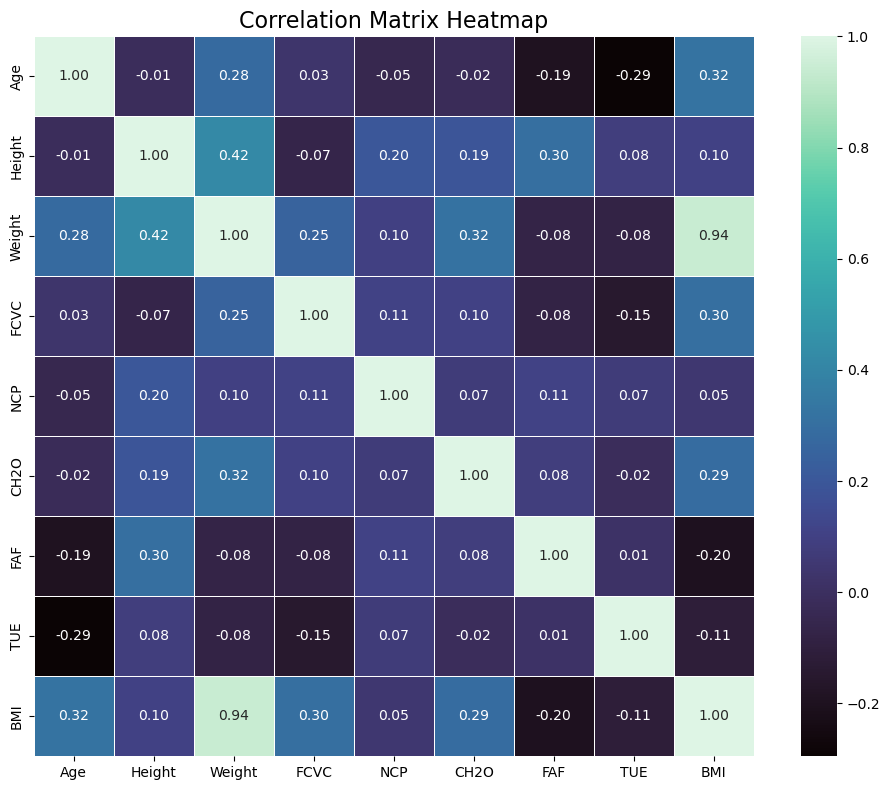

✅ Correlation heatmap saved at: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\4_correlation_heatmap.png


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
# file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
# df = pd.read_csv(file_path)

# --- 2. Select only numerical features for correlation ---
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Include newly created features if they exist
for col in ['Age_BoxCox', 'Weight_BoxCox', 'BMI']:
    if col in df.columns:
        numerical_cols.append(col)

# --- 3. Compute Correlation Matrix ---
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=sns.color_palette("mako", as_cmap=True),  # Corrected
    cbar=True, 
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()

# --- 5. Save Heatmap ---
save_path = r"C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports\4_correlation_heatmap.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Correlation heatmap saved at: {save_path}")


In [18]:
# multinomial logistic regression to find the influence of all variables
import pandas as pd
import numpy as np
from scipy.stats import chi2

# ----------------------------
# 1. Load Data
# ----------------------------
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)

# ----------------------------
# 2. Select numeric columns only
# ----------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols]

# ----------------------------
# 3. Calculate Mahalanobis distance
# ----------------------------
mean_vec = data.mean().values
cov_matrix = np.cov(data.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

def mahalanobis_distance(row):
    diff = row - mean_vec
    return np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))

data['mahalanobis'] = data.apply(lambda row: mahalanobis_distance(row.values), axis=1)

# ----------------------------
# 4. Determine threshold for outliers
# Using Chi-square distribution
# ----------------------------
alpha = 0.01  # significance level
threshold = np.sqrt(chi2.ppf((1 - alpha), df=data.shape[1]-1))
outliers = data[data['mahalanobis'] > threshold]

print(f"Number of multivariate outliers detected: {outliers.shape[0]}")
print(outliers)

# ----------------------------
# Optional: Add an outlier flag to original dataframe
# ----------------------------
df['is_outlier'] = df.index.isin(outliers.index)
df.to_csv('train_with_outliers.csv', index=False)


Number of multivariate outliers detected: 185
          id        Age    Height     Weight  FCVC  NCP  CH2O       FAF  \
14        14  20.000000  1.570000  49.000000   2.0  1.0   1.0  3.000000   
25        25  41.318302  1.853223  96.078462   2.0  3.0   3.0  2.000000   
56        56  55.272573  1.700000  80.000000   3.0  3.0   2.0  0.979701   
269      269  41.000000  1.500000  80.000000   2.0  1.0   1.0  1.000000   
304      304  33.000000  1.720000  83.000000   2.0  1.0   2.0  3.000000   
...      ...        ...       ...        ...   ...  ...   ...       ...   
15183  15183  55.000000  1.670000  80.000000   2.0  1.0   1.0  1.000000   
15214  15214  19.027574  1.763766  42.000000   3.0  1.0   2.0  0.109327   
15317  15317  40.951591  1.589027  80.000000   2.0  1.0   2.0  1.661556   
15361  15361  37.631769  1.549311  80.000000   2.0  1.0   2.0  2.931527   
15507  15507  18.000000  1.600000  82.000000   1.0  1.0   2.0  0.000000   

            TUE  mahalanobis  
14     2.000000     5.

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# ----------------------------
# 1. Load data
# ----------------------------
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)
target_col = 'WeightCategory'  # replace with your multiclass target
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols]
y = df[target_col]

# ----------------------------
# 3. Compute Mahalanobis distance for multivariate outliers
# ----------------------------
mean_vec = X.mean().values
cov_matrix = np.cov(X.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

def mahalanobis_distance(row):
    diff = row - mean_vec
    return np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))

X['mahalanobis'] = X.apply(lambda row: mahalanobis_distance(row.values), axis=1)

# ----------------------------
# 4. Detect outliers
# ----------------------------
alpha = 0.01  # top 1% extreme values
threshold = np.sqrt(chi2.ppf((1 - alpha), df=X.shape[1]-1))
outliers_idx = X[X['mahalanobis'] > threshold].index

print(f"Number of multivariate outliers detected: {len(outliers_idx)}")

# ----------------------------
# 5. Prepare data
# ----------------------------
X_orig = X.drop(columns=['mahalanobis'])
y_orig = y

X_clean = X_orig.drop(outliers_idx)
y_clean = y_orig.drop(outliers_idx)

# ----------------------------
# 6. Train and evaluate multiclass classifier
# ----------------------------
def train_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # weighted works for multiclass
    return acc, f1

acc_orig, f1_orig = train_evaluate(X_orig, y_orig)
acc_clean, f1_clean = train_evaluate(X_clean, y_clean)

# ----------------------------
# 7. Print comparison
# ----------------------------
print("Original data -> Accuracy: {:.4f}, Weighted F1-score: {:.4f}".format(acc_orig, f1_orig))
print("Data without outliers -> Accuracy: {:.4f}, Weighted F1-score: {:.4f}".format(acc_clean, f1_clean))


Number of multivariate outliers detected: 185
Original data -> Accuracy: 0.8806, Weighted F1-score: 0.8796
Data without outliers -> Accuracy: 0.8798, Weighted F1-score: 0.8794


In [20]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LogisticRegression

# # ----------------------------
# # 1. Load dataset
# # ----------------------------
# # df = pd.read_csv('train.csv')
# file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
# df = pd.read_csv(file_path)

# # ----------------------------
# # 2. Add derived features
# # ----------------------------
# # Assuming 'Weight' in kg and 'Height' in meters
# df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# # Optional: add more derived features if needed
# # df['Age_squared'] = df['Age'] ** 2
# # df['Weight_squared'] = df['Weight'] ** 2

# # ----------------------------
# # 3. Separate features (X) and target (y)
# # ----------------------------
# X = df.drop(columns=['WeightCategory'])
# y = df['WeightCategory']

# # ----------------------------
# # 4. Identify column types from X
# # ----------------------------
# # Identify original numeric columns (BEFORE encoding)
# numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# # Identify original categorical columns (BEFORE encoding)
# categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# # Separate categorical into binary vs multiclass
# binary_cols = []
# multiclass_cols = []
# for col in categorical_cols:
#     if X[col].nunique() == 2:
#         binary_cols.append(col)
#     else:
#         multiclass_cols.append(col)

# # ----------------------------
# # 5. Scale numeric features
# # ----------------------------
# # Apply scaling *only* to the original numeric columns
# scaler = StandardScaler()
# X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# # ----------------------------
# # 6. Encode categorical features
# # ----------------------------
# # Label encode binary columns
# le = LabelEncoder()
# for col in binary_cols:
#     X[col] = le.fit_transform(X[col])

# # One-hot encode multiclass columns
# # This will create new columns and drop the originals
# X = pd.get_dummies(X, columns=multiclass_cols, drop_first=True)

# # ----------------------------
# # 7. Train logistic regression
# # ----------------------------
# if y.nunique() > 2:
#     # Multiclass target -> multinomial logistic regression
#     model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# else:
#     # Binary target
#     model = LogisticRegression(solver='lbfgs', max_iter=1000)

# model.fit(X, y)

# # ----------------------------
# # 8. Extract coefficients
# # ----------------------------
# if y.nunique() > 2:
#     coef_df = pd.DataFrame(model.coef_, columns=X.columns, index=model.classes_)
#     coef_df = coef_df.T  # features as rows
# else:
#     coef_df = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])

# print("Logistic Regression Coefficients (Feature Contributions):")
# print(coef_df)

# # Optional: save to CSV
# # coef_df.to_csv('feature_weights_logistic_regression.csv')

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# ----------------------------
# Load dataset
# ----------------------------
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)

# Add BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Separate features and target
X = df.drop(columns=['WeightCategory'])
y = df['WeightCategory']

# Identify column types
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

binary_cols = [col for col in categorical_cols if X[col].nunique() == 2]
multiclass_cols = [col for col in categorical_cols if X[col].nunique() > 2]

# Scale numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Encode categorical features
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

X = pd.get_dummies(X, columns=multiclass_cols, drop_first=True)

# Train logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X, y)

# ----------------------------
# Compute single weight per feature
# ----------------------------
# Take mean of absolute coefficients across classes
coef_single = pd.Series(np.mean(np.abs(model.coef_), axis=0), index=X.columns)
coef_single = coef_single.sort_values(ascending=False)

print("Single weight per feature (overall contribution):")
print(coef_single)

# Optional: save to CSV
# coef_single.to_csv('feature_single_weights.csv')


Single weight per feature (overall contribution):
Weight                            5.420789
BMI                               5.375222
Gender                            2.042412
MTRANS_Public_Transportation      1.063520
FCVC                              0.871441
family_history_with_overweight    0.776201
CALC_no                           0.764819
CALC_Sometimes                    0.677468
CAEC_Frequently                   0.650718
CAEC_no                           0.488644
MTRANS_Walking                    0.473987
SCC                               0.423916
Age                               0.422357
CAEC_Sometimes                    0.412269
NCP                               0.391924
FAVC                              0.371785
MTRANS_Motorbike                  0.358979
Height                            0.289646
SMOKE                             0.252340
CH2O                              0.245601
MTRANS_Bike                       0.232424
FAF                               0.215345
TUE 

In [21]:
# select the main featyres
selected_features = ['BMI', 'Age', 'CH2O', 'FCVC', 'TUE', 'FAF',
                     'Gender', 'NCP', 'family_history_with_overweight']
X = X[selected_features]

In [22]:
# balancing dataset

Frequency Table of WeightCategory:
        WeightCategory  Count  Percentage
0     Obesity_Type_III   2983       19.20
1      Obesity_Type_II   2403       15.47
2        Normal_Weight   2345       15.10
3       Obesity_Type_I   2207       14.21
4  Overweight_Level_II   1881       12.11
5  Insufficient_Weight   1870       12.04
6   Overweight_Level_I   1844       11.87


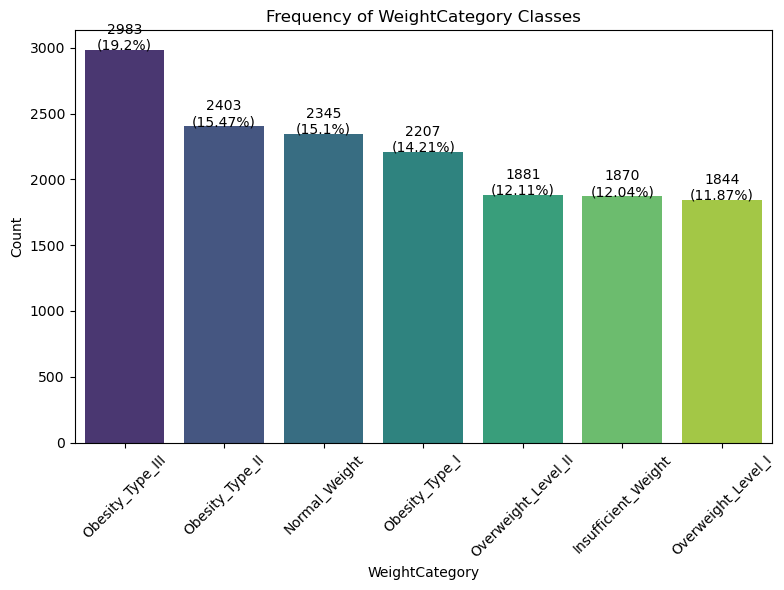

Frequency table and plot saved in folder: C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)

# ----------------------------
# 1. Frequency table
# ----------------------------
freq_table = df['WeightCategory'].value_counts().reset_index()
freq_table.columns = ['WeightCategory', 'Count']
freq_table['Percentage'] = (freq_table['Count'] / freq_table['Count'].sum() * 100).round(2)

print("Frequency Table of WeightCategory:")
print(freq_table)

# ----------------------------
# Save frequency table to CSV
# ----------------------------
output_folder = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\Reports'  # specify your folder
os.makedirs(output_folder, exist_ok=True)
freq_table.to_csv(os.path.join(output_folder, 'WeightCategory_Frequency.csv'), index=False)

# ----------------------------
# 2. Frequency plot
# ----------------------------
plt.figure(figsize=(8,6))
sns.barplot(data=freq_table, x='WeightCategory', y='Count', palette='viridis', order=freq_table['WeightCategory'])
for index, row in freq_table.iterrows():
    plt.text(index, row['Count'] + 1, f"{row['Count']}\n({row['Percentage']}%)", ha='center')
plt.title('Frequency of WeightCategory Classes')
plt.xlabel('WeightCategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# ----------------------------
# Save plot as PNG
# ----------------------------
plot_path = os.path.join(output_folder, '5_WeightCategory_Frequency.png')
plt.savefig(plot_path)
plt.show()

print(f"Frequency table and plot saved in folder: {output_folder}")


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# ----------------------------
# 1. Load dataset
# ----------------------------
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)

# ----------------------------
# 2. Add derived feature BMI
# ----------------------------
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# ----------------------------
# 3. Separate features and target
# ----------------------------
X = df.drop(columns=['WeightCategory'])
y = df['WeightCategory']

# ----------------------------
# 4. Encode categorical features
# ----------------------------
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
binary_cols = [col for col in categorical_cols if X[col].nunique() == 2]
multiclass_cols = [col for col in categorical_cols if X[col].nunique() > 2]

# Label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

# One-hot encode multiclass columns
X = pd.get_dummies(X, columns=multiclass_cols, drop_first=True)

# ----------------------------
# 5. Scale numeric features
# ----------------------------
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# ----------------------------
# 6. Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------------
# 7. Train on original data
# ----------------------------
rf_orig = RandomForestClassifier(n_estimators=200, random_state=42)
rf_orig.fit(X_train, y_train)
y_pred_orig = rf_orig.predict(X_test)

acc_orig = accuracy_score(y_test, y_pred_orig)
f1_orig = f1_score(y_test, y_pred_orig, average='weighted')

print(f"Original Data -> Accuracy: {acc_orig:.4f}, Weighted F1-score: {f1_orig:.4f}")

# ----------------------------
# 8. Apply SMOTE to training data
# ----------------------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# ----------------------------
# 9. Train on SMOTE data
# ----------------------------
rf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)
y_pred_smote = rf_smote.predict(X_test)

acc_smote = accuracy_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote, average='weighted')

print(f"SMOTE Data -> Accuracy: {acc_smote:.4f}, Weighted F1-score: {f1_smote:.4f}")

# ----------------------------
# 10. Conclusion
# ----------------------------
if f1_smote > f1_orig:
    print("SMOTE improved weighted F1-score, helping minority classes.")
else:
    print("SMOTE did not improve performance significantly for this dataset.")


Original Data -> Accuracy: 0.8983, Weighted F1-score: 0.8975
SMOTE Data -> Accuracy: 0.8973, Weighted F1-score: 0.8966
SMOTE did not improve performance significantly for this dataset.


In [25]:
# Preprocessing function that adds BMI and separates the categorical and numerical columns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# ----------------------------
# 1. Preprocessing Function
# ----------------------------
def preprocess_data(df: pd.DataFrame, target_col='WeightCategory'):
    """
    Preprocesses the dataframe:
    - Adds BMI feature
    - Label encodes target
    - Separates numeric and categorical features
    Returns:
    X (features), y (target), num_cols, cat_cols, le_target (LabelEncoder for target)
    """
    df_processed = df.copy()
    
    # Add BMI
    if 'Height' in df_processed.columns and 'Weight' in df_processed.columns:
        if df_processed['Height'].mean() > 10:  # likely cm
            df_processed['Height_m'] = df_processed['Height'] / 100
        else:
            df_processed['Height_m'] = df_processed['Height']
        df_processed['BMI'] = df_processed['Weight'] / (df_processed['Height_m'] ** 2)
        df_processed.drop(columns=['Height_m'], inplace=True)
    
    # Separate target
    y = None
    le_target = None
    if target_col in df_processed.columns:
        le_target = LabelEncoder()
        y = le_target.fit_transform(df_processed[target_col])
        df_processed = df_processed.drop(columns=[target_col, 'id'], errors='ignore')
    
    # Identify numeric and categorical columns
    num_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df_processed.select_dtypes(exclude=[np.number]).columns.tolist()
    
    return df_processed, y, num_cols, cat_cols, le_target

In [26]:
# To call the pre-processing pipeline
file_path = r'C:\Users\Nir\Documents\Mtech 1st sem\ML\ait-511-course-project-1-obesity-risk\train.csv'
df = pd.read_csv(file_path)
X, y, num_cols, cat_cols, le_target = preprocess_data(df)

In [27]:
# MODEL SELECTION

In [28]:
# Bagging ensemble using XGBoost as the base estimator with StandardScaler for numeric features and OneHotEncoder for categorical features.

In [29]:
# Bagging ensemble using XGBoost as the base estimator with StandardScaler for numeric features and OneHotEncoder for categorical features.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

def train_model(df, target_col='WeightCategory'):
    # 1. Preprocess
    X, y, num_cols, cat_cols, le_target = preprocess_data(df, target_col)
    
    # 2. Train-test split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    # 3. Preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])
    
    # 4. Base XGBoost
    base_xgb = XGBClassifier(
        n_estimators=900,
        max_depth=5,
        learning_rate=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    
    # 5. Bagging
    bag_xgb = BaggingClassifier(
        estimator=base_xgb,
        n_estimators=23,
        max_samples=0.8,
        max_features=0.8,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )
    
    # 6. Full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('bagging', bag_xgb)
    ])
    
    # 7. Train
    pipeline.fit(X_train, y_train)
    
    # 8. Evaluate
    y_val_pred = pipeline.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {acc*100:.2f}%")
    
    # Confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    print("Confusion Matrix:\n", cm)
    
    # TP, TN, FP, FN per class
    report = classification_report(y_val, y_val_pred, target_names=le_target.classes_)
    print("\nClassification Report:\n", report)
    
    # Save pipeline
    with open('trained_pipeline.pkl', 'wb') as f:
        pickle.dump(pipeline, f)
    
    return pipeline, acc, cm, report


In [30]:
pipeline, acc, cm, report = train_model(df)

Validation Accuracy: 90.34%
Confusion Matrix:
 [[352  19   0   0   0   3   0]
 [ 22 422   0   0   0  21   4]
 [  0   0 381  18   4  12  26]
 [  0   0   9 469   1   0   2]
 [  0   0   0   0 596   1   0]
 [  4  33  15   1   0 272  44]
 [  0   3  28   3   0  27 315]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       374
      Normal_Weight       0.88      0.90      0.89       469
     Obesity_Type_I       0.88      0.86      0.87       441
    Obesity_Type_II       0.96      0.98      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.81      0.74      0.77       369
Overweight_Level_II       0.81      0.84      0.82       376

           accuracy                           0.90      3107
          macro avg       0.89      0.89      0.89      3107
       weighted avg       0.90      0.90      0.90      3107



In [31]:
# XGBoost classifier with preprocessing: OrdinalEncoder + OneHotEncoder + Box-Cox PowerTransformer (numeric features).

In [32]:
# -----------------------------
# train_model function for Code 2
# -----------------------------
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_model_xgb(df, target_col='WeightCategory'):
    """
    Train XGBoost pipeline with preprocessing:
    OrdinalEncoder + OneHotEncoder + PowerTransformer
    """
    # Separate features and target
    X = df.drop(columns=[target_col, 'id'], errors='ignore')
    y_raw = df[target_col]
    
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    
    # Save LabelEncoder
    joblib.dump(le, 'label_encoder_code2.joblib')
    
    # Define column groups
    ordinal_cols = ['CAEC','CALC','Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
    one_hot_cols = ['MTRANS']
    numeric_cols = ['Age','Weight']
    
    # Ordinal categories
    caec_order = ['no', 'Sometimes', 'Frequently', 'Always']
    calc_order = ['no', 'Sometimes', 'Frequently']
    gender_order = ['Male', 'Female']
    yes_no_order = ['no', 'yes']
    categories_order = [caec_order, calc_order, gender_order, yes_no_order, yes_no_order, yes_no_order, yes_no_order]
    
    # Preprocessing
    preprocessor = ColumnTransformer([
        ('ordinal', OrdinalEncoder(categories=categories_order), ordinal_cols),
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_cols),
        ('boxcox', PowerTransformer(method='box-cox'), numeric_cols)
    ], remainder='passthrough', verbose_feature_names_out=False)
    
    # Model
    model = XGBClassifier(
        n_estimators=700,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    
    # Full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train-test split for validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Evaluate
    y_val_pred = pipeline.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, target_names=le.classes_)
    
    print(f"Validation Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    
    # Retrain on full dataset
    pipeline.fit(X, y)
    
    # Save final pipeline
    joblib.dump(pipeline, 'obesity_model_pipeline_code2.joblib')
    
    return pipeline, acc, cm, report


In [33]:
# df = pd.read_csv("train.csv")
pipeline2, acc2, cm2, report2 = train_model_xgb(df)


Validation Accuracy: 90.79%
Confusion Matrix:
 [[352  19   0   0   0   3   0]
 [ 26 420   0   0   0  18   5]
 [  0   1 386  16   4  10  24]
 [  0   0   9 468   2   0   2]
 [  0   0   0   0 596   1   0]
 [  4  25  14   0   0 286  40]
 [  0   3  27   3   0  30 313]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93       374
      Normal_Weight       0.90      0.90      0.90       469
     Obesity_Type_I       0.89      0.88      0.88       441
    Obesity_Type_II       0.96      0.97      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.82      0.78      0.80       369
Overweight_Level_II       0.82      0.83      0.82       376

           accuracy                           0.91      3107
          macro avg       0.90      0.90      0.90      3107
       weighted avg       0.91      0.91      0.91      3107



In [34]:
# Voting classifier combining K-Nearest Neighbors and XGBoost, with preprocessing: OrdinalEncoder + OneHotEncoder + PowerTransformer + StandardScaler.

In [35]:
# -----------------------------
# train_model function for Voting (KNN + XGBoost)
# -----------------------------
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

def train_model_voting_knn_xgb(df, target_col='WeightCategory'):
    """
    Train Voting classifier pipeline combining KNN + XGBoost with preprocessing:
    OrdinalEncoder + OneHotEncoder + PowerTransformer + StandardScaler
    """
    # Feature engineering
    df = df.copy()
    df['BMI'] = df['Weight'] / (df['Height'] ** 2)
    df['Activity_vs_Tech'] = df['FAF'] / (df['TUE'] + 1)
    caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    favc_map = {'no': 0, 'yes': 1}
    df['Diet_Score'] = df['FCVC'] - df['CAEC'].map(caec_map) - df['FAVC'].map(favc_map)

    # Separate features and target
    X = df.drop(columns=[target_col, 'id'], errors='ignore')
    y_raw = df[target_col]
    
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    joblib.dump(le, 'label_encoder_voting_knn_xgb.joblib')
    
    # Preprocessing
    ordinal_cols = ['CAEC','CALC','Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
    one_hot_cols = ['MTRANS']
    numeric_boxcox = ['Age','Weight']
    numeric_scale = ['Height','FCVC','NCP','CH2O','FAF','TUE']
    
    caec_order = ['no', 'Sometimes', 'Frequently', 'Always']
    calc_order = ['no', 'Sometimes', 'Frequently']
    gender_order = ['Male', 'Female']
    yes_no_order = ['no','yes']
    categories_order = [caec_order, calc_order, gender_order, yes_no_order, yes_no_order, yes_no_order, yes_no_order]
    
    preprocessor = ColumnTransformer([
        ('ordinal', OrdinalEncoder(categories=categories_order), ordinal_cols),
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_cols),
        ('boxcox', PowerTransformer(method='box-cox'), numeric_boxcox),
        ('scaler', StandardScaler(), numeric_scale)
    ], remainder='drop', verbose_feature_names_out=False)
    
    # Models
    base_xgb = XGBClassifier(
        n_estimators=700,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    base_knn = KNeighborsClassifier(n_neighbors=11, weights='distance', n_jobs=-1)
    
    voting_model = VotingClassifier(
        estimators=[('knn', base_knn), ('xgb', base_xgb)],
        voting='soft',
        weights=[1,3],
        n_jobs=-1
    )
    
    # Full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', voting_model)
    ])
    
    # Train-test split for validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Evaluate
    y_val_pred = pipeline.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, target_names=le.classes_)
    
    print(f"Validation Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    
    # Retrain on full dataset
    pipeline.fit(X, y)
    
    # Save pipeline
    joblib.dump(pipeline, 'obesity_model_pipeline_voting_knn_xgb_final.joblib')
    
    return pipeline, acc, cm, report

In [36]:
pipeline_voting, acc_voting, cm_voting, report_voting = train_model_voting_knn_xgb(df)

Validation Accuracy: 90.44%
Confusion Matrix:
 [[353  18   0   0   0   3   0]
 [ 21 418   0   0   0  24   6]
 [  0   1 381  19   4  11  25]
 [  0   0   9 469   1   0   2]
 [  0   0   0   0 596   1   0]
 [  4  29  15   0   0 280  41]
 [  0   4  24   4   0  31 313]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       374
      Normal_Weight       0.89      0.89      0.89       469
     Obesity_Type_I       0.89      0.86      0.88       441
    Obesity_Type_II       0.95      0.98      0.96       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.80      0.76      0.78       369
Overweight_Level_II       0.81      0.83      0.82       376

           accuracy                           0.90      3107
          macro avg       0.90      0.89      0.89      3107
       weighted avg       0.90      0.90      0.90      3107



In [37]:
# Voting Classifier combining Logistic Regression + KNN + XGBoost

In [38]:
# -----------------------------
# train_model function for Voting (LR + KNN + XGBoost)
# -----------------------------
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

def train_model_voting_lr_knn_xgb(df, target_col='WeightCategory'):
    """
    Train Voting classifier pipeline combining Logistic Regression + KNN + XGBoost with preprocessing:
    OrdinalEncoder + OneHotEncoder + PowerTransformer + StandardScaler
    """
    # Feature engineering
    df = df.copy()
    df['BMI'] = df['Weight'] / (df['Height'] ** 2)
    df['Activity_vs_Tech'] = df['FAF'] / (df['TUE'] + 1)
    caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    favc_map = {'no': 0, 'yes': 1}
    df['Diet_Score'] = df['FCVC'] - df['CAEC'].map(caec_map) - df['FAVC'].map(favc_map)

    # Separate features and target
    X = df.drop(columns=[target_col, 'id'], errors='ignore')
    y_raw = df[target_col]
    
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    joblib.dump(le, 'label_encoder_voting_lr_knn_xgb.joblib')
    
    # Preprocessing
    ordinal_cols = ['CAEC','CALC','Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
    one_hot_cols = ['MTRANS']
    numeric_boxcox = ['Age','Weight']
    numeric_scale = ['Height','FCVC','NCP','CH2O','FAF','TUE']
    
    caec_order = ['no', 'Sometimes', 'Frequently', 'Always']
    calc_order = ['no', 'Sometimes', 'Frequently']
    gender_order = ['Male', 'Female']
    yes_no_order = ['no','yes']
    categories_order = [caec_order, calc_order, gender_order, yes_no_order, yes_no_order, yes_no_order, yes_no_order]
    
    preprocessor = ColumnTransformer([
        ('ordinal', OrdinalEncoder(categories=categories_order), ordinal_cols),
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_cols),
        ('boxcox', PowerTransformer(method='box-cox'), numeric_boxcox),
        ('scaler', StandardScaler(), numeric_scale)
    ], remainder='drop', verbose_feature_names_out=False)
    
    # Models
    base_xgb = XGBClassifier(
        n_estimators=700,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    base_knn = KNeighborsClassifier(n_neighbors=11, weights='distance', n_jobs=-1)
    base_lr = LogisticRegression(max_iter=2100, random_state=42, n_jobs=-1)
    
    voting_model = VotingClassifier(
        estimators=[('lr', base_lr), ('knn', base_knn), ('xgb', base_xgb)],
        voting='hard',
        weights=[2,2,6],
        n_jobs=-1
    )
    
    # Full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', voting_model)
    ])
    
    # Train-test split for validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Evaluate
    y_val_pred = pipeline.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, target_names=le.classes_)
    
    print(f"Validation Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    
    # Retrain on full dataset
    pipeline.fit(X, y)
    
    # Save pipeline
    joblib.dump(pipeline, 'obesity_model_pipeline_voting_lr_knn_xgb_final.joblib')
    
    return pipeline, acc, cm, report


In [39]:
pipeline_voting, acc_voting, cm_voting, report_voting = train_model_voting_lr_knn_xgb(df)

Validation Accuracy: 90.41%
Confusion Matrix:
 [[350  21   0   0   0   3   0]
 [ 24 420   0   0   0  20   5]
 [  0   1 380  18   4  12  26]
 [  0   0   9 468   2   0   2]
 [  0   0   0   0 596   1   0]
 [  4  27  16   0   0 281  41]
 [  0   3  25   4   0  30 314]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       374
      Normal_Weight       0.89      0.90      0.89       469
     Obesity_Type_I       0.88      0.86      0.87       441
    Obesity_Type_II       0.96      0.97      0.96       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.81      0.76      0.78       369
Overweight_Level_II       0.81      0.84      0.82       376

           accuracy                           0.90      3107
          macro avg       0.89      0.89      0.89      3107
       weighted avg       0.90      0.90      0.90      3107



In [40]:
# Bagged XGBoost and Bagged AdaBoost

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

def train_model_bagged_xgb_ada(df, target_col='WeightCategory'):
    """
    Train Bagging ensembles:
    1. Bagged XGBoost
    2. Bagged AdaBoost
    Includes preprocessing (StandardScaler + OneHotEncoder) and Label Encoding.
    """
    # Features and target
    X = df.drop(['id', target_col], axis=1, errors='ignore')
    y_raw = df[target_col]
    
    # Label encoding
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    with open('label_encoder_bagging.pkl', 'wb') as f:
        pickle.dump(le, f)
    
    # Identify numeric and categorical columns
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Base models
    xgb_base = XGBClassifier(
        n_estimators=700, max_depth=2, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        use_label_encoder=False, eval_metric='mlogloss', random_state=42
    )
    adaboost_base = AdaBoostClassifier(
        n_estimators=300, learning_rate=0.5, random_state=42
    )
    
    # Bagging ensembles
    bag_xgb = BaggingClassifier(
        estimator=xgb_base, n_estimators=15,
        max_samples=0.8, max_features=0.8,
        bootstrap=True, n_jobs=-1, random_state=42
    )
    bag_ada = BaggingClassifier(
        estimator=adaboost_base, n_estimators=15,
        max_samples=0.8, max_features=0.8,
        bootstrap=True, n_jobs=-1, random_state=42
    )
    
    # Preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])
    
    # Wrap Bagging in pipelines
    pipeline_xgb = Pipeline([('preprocessor', preprocessor), ('bag_xgb', bag_xgb)])
    pipeline_ada = Pipeline([('preprocessor', preprocessor), ('bag_ada', bag_ada)])
    
    # Train
    pipeline_xgb.fit(X_train, y_train)
    pipeline_ada.fit(X_train, y_train)
    
    # Evaluate
    y_val_pred_xgb = pipeline_xgb.predict(X_val)
    y_val_pred_ada = pipeline_ada.predict(X_val)
    
    acc_xgb = accuracy_score(y_val, y_val_pred_xgb)
    acc_ada = accuracy_score(y_val, y_val_pred_ada)
    
    print(f"Validation Bagged XGBoost Accuracy: {acc_xgb*100:.2f}%")
    print(f"Validation Bagged AdaBoost Accuracy: {acc_ada*100:.2f}%")
    
    # Save pipelines
    with open('pipeline_bagged_xgb.pkl', 'wb') as f:
        pickle.dump(pipeline_xgb, f)
    with open('pipeline_bagged_ada.pkl', 'wb') as f:
        pickle.dump(pipeline_ada, f)
    
    return (pipeline_xgb, acc_xgb), (pipeline_ada, acc_ada)


In [42]:
(xgb_model, xgb_acc), (ada_model, ada_acc) = train_model_bagged_xgb_ada(df)


Validation Bagged XGBoost Accuracy: 90.02%
Validation Bagged AdaBoost Accuracy: 79.24%


In [43]:
# -----------------------------
# train_model function for Hybrid Bagging + Voting (15 XGB + 15 LogisticRegression)
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import pickle

def train_model_hybrid_bagging_voting(df, target_col='WeightCategory'):
    """
    Trains a large ensemble combining 15 XGBClassifier pipelines and
    15 LogisticRegression pipelines with soft voting.
    """
    df = df.copy()
    
    # Separate features and target
    X = df.drop(columns=['id', target_col], errors='ignore')
    y_raw = df[target_col]
    
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    
    # Save LabelEncoder
    with open('label_encoder_hybrid_bagging_voting.pkl', 'wb') as f:
        pickle.dump(le, f)
    
    # Numeric and categorical columns
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    # Preprocessing
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])
    
    # Build 15 XGB + 15 LogisticRegression pipelines
    estimators = []
    for i in range(15):
        estimators.append((f'xgb_{i}', Pipeline([
            ('preprocessor', preprocessor),
            ('model', XGBClassifier(
                n_estimators=300,
                max_depth=2,
                learning_rate=0.05,
                subsample=0.8,
                colsample_bytree=0.8,
                use_label_encoder=False,
                eval_metric='mlogloss',
                random_state=42 + i
            ))
        ])))
    
    for i in range(15):
        estimators.append((f'logreg_{i}', Pipeline([
            ('preprocessor', preprocessor),
            ('model', LogisticRegression(max_iter=3000, solver='lbfgs', multi_class='multinomial'))
        ])))
    
    # Soft Voting Ensemble
    voting_ensemble = VotingClassifier(
        estimators=estimators,
        voting='soft',
        n_jobs=-1
    )
    
    # Train ensemble
    voting_ensemble.fit(X_train, y_train)
    
    # Evaluate
    y_val_pred = voting_ensemble.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, target_names=le.classes_)
    
    print(f"Validation Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    
    # Retrain on full dataset
    voting_ensemble.fit(X, y)
    
    return voting_ensemble, acc, cm, report


In [44]:
voting_model, val_acc, val_cm, val_report = train_model_hybrid_bagging_voting(df)

Validation Accuracy: 88.54%
Confusion Matrix:
 [[352  20   0   0   0   2   0]
 [ 40 398   0   0   0  27   4]
 [  0   0 377  20   4  12  28]
 [  0   0   6 472   1   0   2]
 [  0   0   1   0 596   0   0]
 [  3  31  12   0   0 265  58]
 [  0   6  40   4   0  35 291]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.92       374
      Normal_Weight       0.87      0.85      0.86       469
     Obesity_Type_I       0.86      0.85      0.86       441
    Obesity_Type_II       0.95      0.98      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.78      0.72      0.75       369
Overweight_Level_II       0.76      0.77      0.77       376

           accuracy                           0.89      3107
          macro avg       0.87      0.87      0.87      3107
       weighted avg       0.88      0.89      0.88      3107



In [45]:
# hybrid ensemble of KNN + XGBoost + Decision Trees

In [46]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_model_hybrid_knn_xgb_dt(df, target_col='WeightCategory'):
    """
    Train a hybrid ensemble of KNN + XGBoost + Decision Trees with proper preprocessing.
    KNN requires scaled numeric features, tree-based models handle categorical encodings.
    """
    
    df = df.copy()
    
    # Separate features and target
    X = df.drop(columns=[target_col, 'id'], errors='ignore')
    y_raw = df[target_col]
    
    # Encode target
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    joblib.dump(le, 'label_encoder_hybrid_knn_xgb_dt.joblib')
    
    # Identify categorical and numeric columns
    cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    
    # Preprocessing
    preprocessor = ColumnTransformer([
        ('ordinal', OrdinalEncoder(), cat_cols),
        ('scaler', StandardScaler(), num_cols)
    ], remainder='passthrough', verbose_feature_names_out=False)
    
    # ----- Define ensembles -----
    n_features = X.shape[1]
    
    # KNN models
    knn_models = []
    for i in range(5):
        knn_models.append(('knn_'+str(i), KNeighborsClassifier(n_neighbors=3+i, weights='distance', n_jobs=-1)))
    
    # XGBoost models
    xgb_models = []
    for i in range(5):
        xgb_models.append(('xgb_'+str(i), XGBClassifier(
            n_estimators=700,
            max_depth=4 + (i % 3),
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            use_label_encoder=False,
            eval_metric='mlogloss',
            random_state=42+i
        )))
    
    # Decision Tree models
    dt_models = []
    for i in range(5):
        dt_models.append(('dt_'+str(i), DecisionTreeClassifier(
            max_depth=2 + (i % 3),
            min_samples_leaf=2,
            random_state=42+i
        )))
    
    all_models = knn_models + xgb_models + dt_models
    
    # Voting ensemble
    ensemble = VotingClassifier(
        estimators=all_models,
        voting='soft',
        n_jobs=-1
    )
    
    # Full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('ensemble', ensemble)
    ])
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Predict & evaluate
    y_val_pred = pipeline.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, target_names=le.classes_)
    
    print(f"✅ Hybrid KNN+XGB+DT Soft Voting Ensemble Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    
    # Retrain on full dataset
    pipeline.fit(X, y)
    
    return pipeline, acc, cm, report


In [47]:
ensemble_model, val_acc, val_cm, val_report = train_model_hybrid_knn_xgb_dt(df)

✅ Hybrid KNN+XGB+DT Soft Voting Ensemble Accuracy: 88.96%
Confusion Matrix:
 [[355  16   0   0   0   3   0]
 [ 28 412   0   0   0  25   4]
 [  0   0 366  30   4   9  32]
 [  0   0   7 472   0   0   2]
 [  0   0   0   0 596   1   0]
 [  4  40  18   1   0 252  54]
 [  0   9  27   4   0  25 311]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.95      0.93       374
      Normal_Weight       0.86      0.88      0.87       469
     Obesity_Type_I       0.88      0.83      0.85       441
    Obesity_Type_II       0.93      0.98      0.96       481
   Obesity_Type_III       0.99      1.00      1.00       597
 Overweight_Level_I       0.80      0.68      0.74       369
Overweight_Level_II       0.77      0.83      0.80       376

           accuracy                           0.89      3107
          macro avg       0.88      0.88      0.88      3107
       weighted avg       0.89      0.89      0.89      3107



In [48]:
# Bagging + LightGBM ensemble

In [49]:
# -----------------------------
# Train Bagging LGBM Model
# -----------------------------
import pandas as pd
import joblib
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_model_bagging_lgbm(df, target_col='WeightCategory'):
    """
    Train a Bagging ensemble with LGBMClassifier as base estimator.
    Preprocesses numeric and categorical features internally.
    Returns pipeline, validation accuracy, confusion matrix, and classification report.
    """
    df = df.copy()
    
    # Separate features and target
    X = df.drop(columns=[target_col, 'id'], errors='ignore')
    y = df[target_col]
    
    # Identify numeric and categorical columns
    num_cols = X.select_dtypes(include=np.number).columns.tolist()
    cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
    
    # Preprocessing
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    # Define base LGBM
    base_lgbm = LGBMClassifier(
        n_estimators=900,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=1,
        verbose=-1
    )
    
    # Bagging wrapper
    bag_lgbm = BaggingClassifier(
        estimator=base_lgbm,
        n_estimators=20,
        max_samples=0.8,
        max_features=0.8,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )
    
    # Full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('bagging_lgbm', bag_lgbm)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Validation metrics
    y_val_pred = pipeline.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, zero_division=0)
    
    print(f"✅ Bagging LGBM Validation Accuracy: {acc_val*100:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    
    # Retrain on full dataset
    pipeline.fit(X, y)
    
    return pipeline, acc_val, cm, report

In [50]:
ensemble_model, val_acc, val_cm, val_report = train_model_bagging_lgbm(df)

✅ Bagging LGBM Validation Accuracy: 90.73%
Confusion Matrix:
 [[350  21   0   0   0   3   0]
 [ 19 422   0   0   0  22   6]
 [  0   2 381  19   4  11  24]
 [  0   0   8 471   0   0   2]
 [  0   0   0   0 596   1   0]
 [  4  28  14   0   0 281  42]
 [  0   3  24   4   0  27 318]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       374
      Normal_Weight       0.89      0.90      0.89       469
     Obesity_Type_I       0.89      0.86      0.88       441
    Obesity_Type_II       0.95      0.98      0.97       481
   Obesity_Type_III       0.99      1.00      1.00       597
 Overweight_Level_I       0.81      0.76      0.79       369
Overweight_Level_II       0.81      0.85      0.83       376

           accuracy                           0.91      3107
          macro avg       0.90      0.90      0.90      3107
       weighted avg       0.91      0.91      0.91      3107



In [51]:
# Soft Voting Ensemble of LGBM + XGB + CatBoost + Logistic Regression

In [52]:
# -----------------------------
# Train function for Soft Voting Ensemble: LGBM + XGB + CatBoost + Logistic Regression
# -----------------------------
def train_model_voting_lgbm_xgb_cat_logreg(df, target_col='WeightCategory'):
    """
    Train a Soft Voting Ensemble combining LGBM, XGBoost, CatBoost, and Logistic Regression.
    Preprocessing: StandardScaler for numeric features, OneHotEncoder for categorical features.
    """
    from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.ensemble import VotingClassifier
    import lightgbm as lgb
    from xgboost import XGBClassifier
    from catboost import CatBoostClassifier
    from sklearn.linear_model import LogisticRegression
    import numpy as np

    df = df.copy()

    # Separate features and target
    X = df.drop(columns=[target_col, 'id'], errors='ignore')
    y_raw = df[target_col]

    # Feature engineering
    X['BMI'] = X['Weight'] / (X['Height'] ** 2)

    # Encode target
    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    target_names = le.classes_
    num_classes = len(target_names)

    # Split dataset
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Define features
    numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
    categorical_features = [
        'Gender', 'family_history_with_overweight', 'FAVC',
        'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'
    ]

    # Preprocessing pipelines
    numeric_transformer = Pipeline([('scaler', StandardScaler())])
    categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    # Preprocess train/val
    X_train_proc = preprocessor.fit_transform(X_train)
    X_val_proc = preprocessor.transform(X_val)

    # Define models
    lgb_model = lgb.LGBMClassifier(
        objective='multiclass',
        num_class=num_classes,
        learning_rate=0.0243,
        n_estimators=508,
        num_leaves=16,
        max_depth=10,
        min_child_samples=31,
        reg_alpha=0.361,
        reg_lambda=0.469,
        colsample_bytree=0.8,
        subsample=0.7,
        random_state=42,
        n_jobs=-1
    )

    xgb_model = XGBClassifier(
        objective='multi:softprob',
        num_class=num_classes,
        learning_rate=0.05,
        n_estimators=500,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        n_jobs=-1
    )

    cat_model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        loss_function='MultiClass',
        verbose=0,
        random_seed=42
    )

    logreg_model = LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced',
        n_jobs=-1
    )

    # Voting ensemble
    voting_clf = VotingClassifier(
        estimators=[
            ('lgb', lgb_model),
            ('xgb', xgb_model),
            ('cat', cat_model),
            ('logreg', logreg_model)
        ],
        voting='soft',
        n_jobs=-1
    )

    # Train ensemble
    voting_clf.fit(X_train_proc, y_train)

    # Validation
    y_val_pred = voting_clf.predict(X_val_proc)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_cm = confusion_matrix(y_val, y_val_pred)
    val_report = classification_report(y_val, y_val_pred, target_names=target_names, output_dict=True)

    print(f"Validation Accuracy: {val_acc*100:.2f}%")

    # Return ensemble and validation metrics
    return voting_clf, val_acc, val_cm, val_report

In [53]:
voting_ensemble_model, val_acc, val_cm, val_report = train_model_voting_lgbm_xgb_cat_logreg(df)

Validation Accuracy: 90.28%
